<a href="https://colab.research.google.com/github/madanadi0305/Car_Rentals_Analysis/blob/main/Car_rental_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv("/content/sample_data/Project.csv")

In [ ]:
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


In [ ]:
df.describe()

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
count,5339.000000,5339.000000,5339.000000,5339.000000,5339.000000,5.339000e+03,5339.000000,5339.000000
mean,4.920453,36.631766,31.150403,35.579633,-99.805363,5.829449e+06,90.991759,2015.291815
std,0.182333,42.528680,35.620282,6.438336,20.387466,4.503836e+06,90.109859,3.915541
min,1.000000,1.000000,1.000000,21.272565,-158.165693,5.105000e+03,20.000000,1955.000000
25%,4.900000,8.000000,7.000000,30.472322,-117.171065,1.821886e+06,44.000000,2013.000000
50%,5.000000,21.000000,19.000000,35.511217,-96.043475,4.867754e+06,68.000000,2016.000000
75%,5.000000,49.000000,42.000000,40.000670,-81.558578,9.380383e+06,109.000000,2018.000000
max,5.000000,395.000000,321.000000,64.893610,-68.823637,1.576071e+07,1500.000000,2020.000000


In [ ]:
#Average daily rate is $90.99, average rating is 5, average no of trips taken is 37.

In [ ]:
df.shape

(5339, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5339 entries, 0 to 5338
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5339 non-null   object 
 1   rating              5339 non-null   float64
 2   renterTripsTaken    5339 non-null   int64  
 3   reviewCount         5339 non-null   int64  
 4   location.city       5339 non-null   object 
 5   location.latitude   5339 non-null   float64
 6   location.longitude  5339 non-null   float64
 7   location.state      5339 non-null   object 
 8   owner.id            5339 non-null   int64  
 9   rate.daily          5339 non-null   int64  
 10  vehicle.make        5339 non-null   object 
 11  vehicle.model       5339 non-null   object 
 12  vehicle.type        5339 non-null   object 
 13  vehicle.year        5339 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 584.1+ KB


In [ ]:
df[df.duplicated()]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year


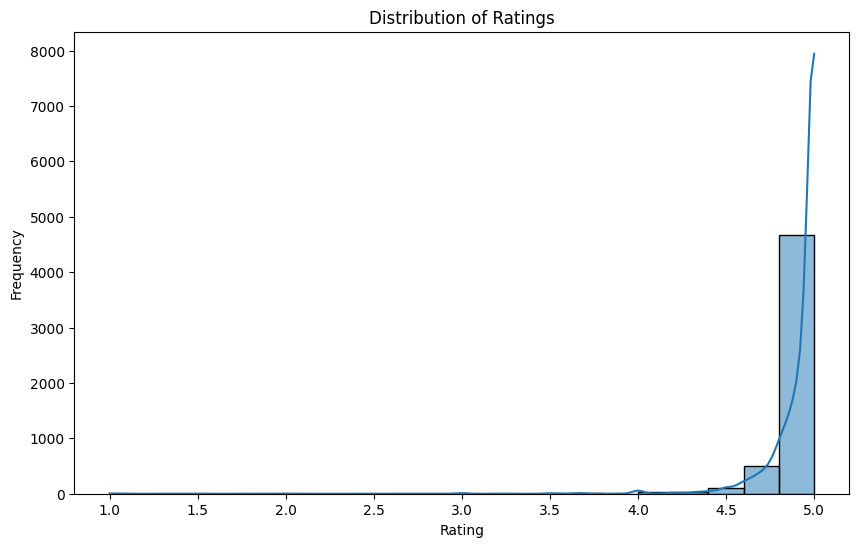

In [ ]:
# prompt: Histogram for rating

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)  # Adjust bins as needed
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
#Conclusion: Most of the ratings are between 4.0 and 5.0

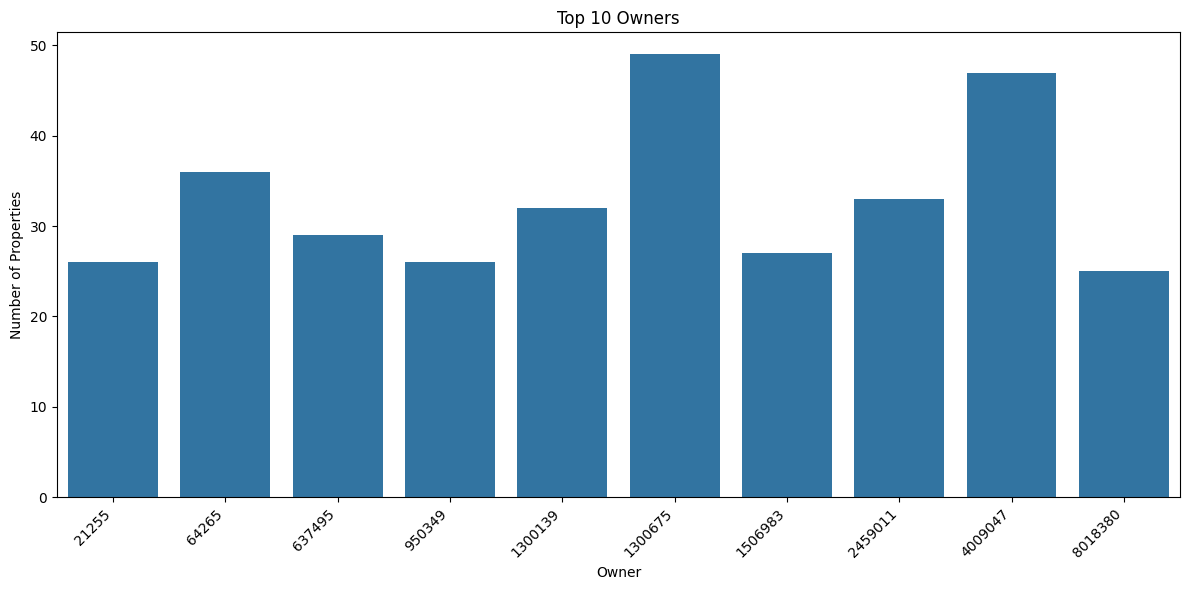

In [ ]:
# prompt: bar chart for top 10 owners

top_10_owners = df['owner.id'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_owners.index, y=top_10_owners.values)
plt.title('Top 10 Owners')
plt.xlabel('Owner')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

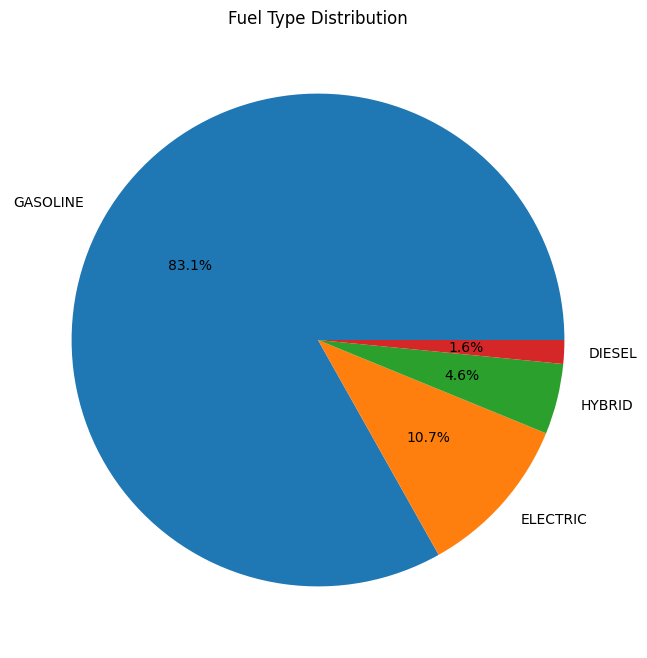

In [ ]:
# prompt: fuel types pie chart

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Assuming your DataFrame is named 'df' and already loaded
# If not, replace this with your data loading code:
# df = pd.read_csv("your_file.csv")

# Assuming 'fuelType' is a column in your DataFrame
plt.figure(figsize=(8, 8))
df['fuelType'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Fuel Type Distribution')
plt.ylabel('')  # Remove the y-axis label
plt.show()
#Conclusion: Cars with Gasoline as fuel are the most rented followed by electric, hybrid and diesel

In [ ]:
df['vehicle.type'].unique()

array(['suv', 'car', 'truck', 'minivan', 'van'], dtype=object)

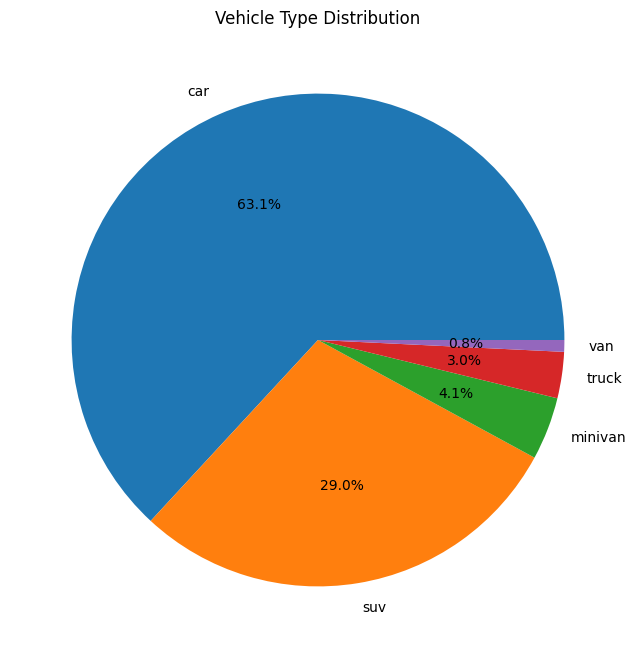

In [ ]:
# prompt: pie chart for vehicle.type

# Assuming your DataFrame is named 'df' and already loaded
# If not, replace this with your data loading code:
# df = pd.read_csv("your_file.csv")

# Assuming 'vehicle.type' is a column in your DataFrame
plt.figure(figsize=(8, 8))
df['vehicle.type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Vehicle Type Distribution')
plt.ylabel('')  # Remove the y-axis label
plt.show()

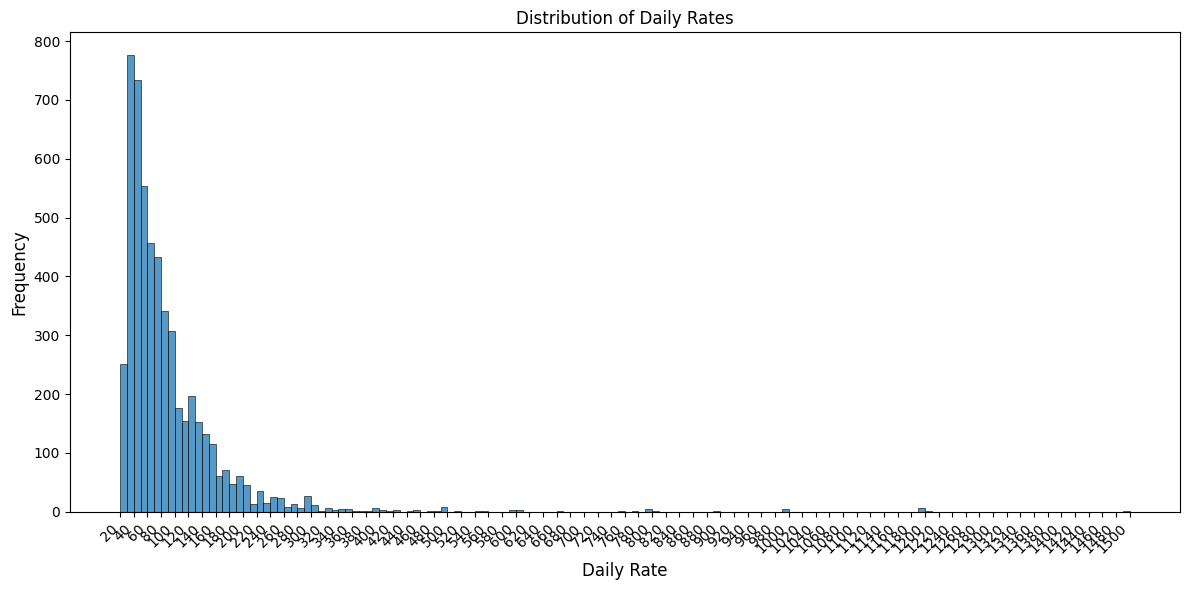

In [ ]:
# prompt: histogram of daily rates with bin size of 10. Add more labelling on Daily Rate axis

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Assuming your DataFrame is named 'df' and already loaded
# If not, replace this with your data loading code:
# df = pd.read_csv("your_file.csv")

# Assuming 'DailyRate' is a column in your DataFrame
plt.figure(figsize=(12, 6))
sns.histplot(df['rate.daily'], bins=range(min(df['rate.daily']), max(df['rate.daily']) + 10, 10), kde=False)
plt.title('Distribution of Daily Rates')
plt.xlabel('Daily Rate', fontsize=12) # Increased font size for better readability
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotated x-axis labels and adjusted font size
plt.yticks(fontsize=10)

# Add more labels to the Daily Rate axis
# Adjust the tick locations and labels as needed
plt.xticks(range(min(df['rate.daily']), max(df['rate.daily']) + 10, 20)) # Example: add ticks every 20 units

plt.tight_layout()
plt.show()

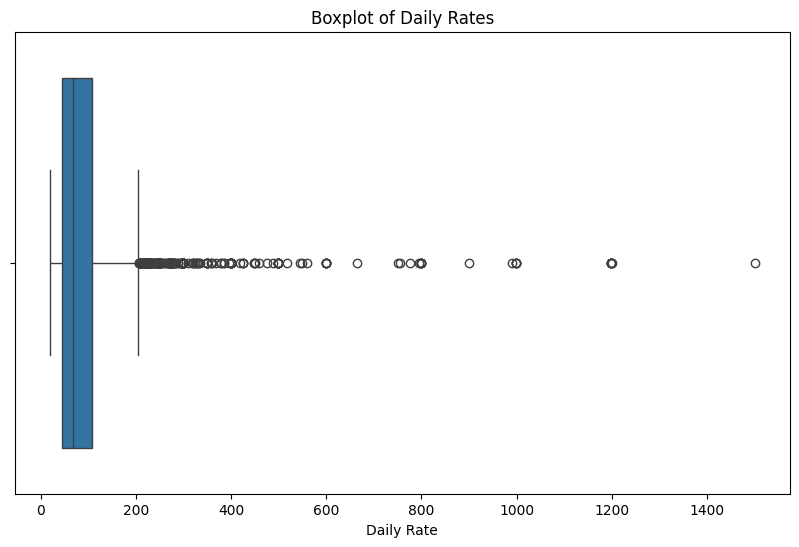

In [ ]:
# prompt: boxplot for rate.daily column

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['rate.daily'])
plt.title('Boxplot of Daily Rates')
plt.xlabel('Daily Rate')
plt.show()
#Conclusion: Most of the cars have rental between 0 and 200 with few outliers above $200 of daily rate

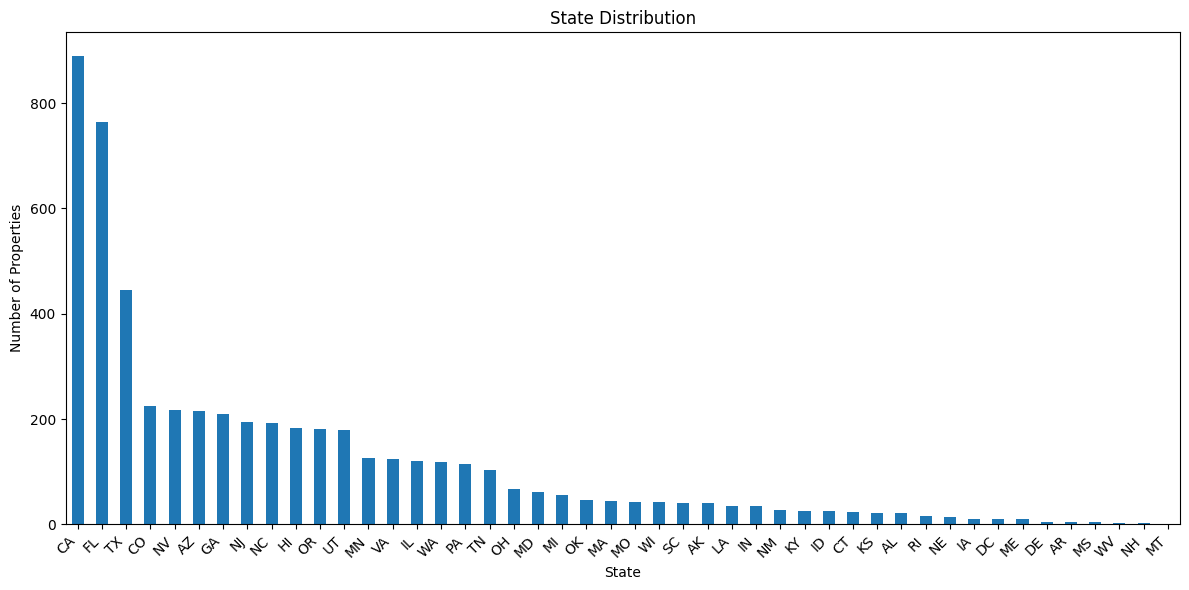

In [ ]:
# prompt: states distibution

# Assuming your DataFrame is named 'df' and already loaded
# If not, replace this with your data loading code:
# df = pd.read_csv("your_file.csv")

# Assuming 'state' is a column in your DataFrame
plt.figure(figsize=(12, 6))
df['location.state'].value_counts().plot(kind='bar')
plt.title('State Distribution')
plt.xlabel('State')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
#Conclusion: Looks like most of the car rentals have been from the California,Florida,Texas and Colorado

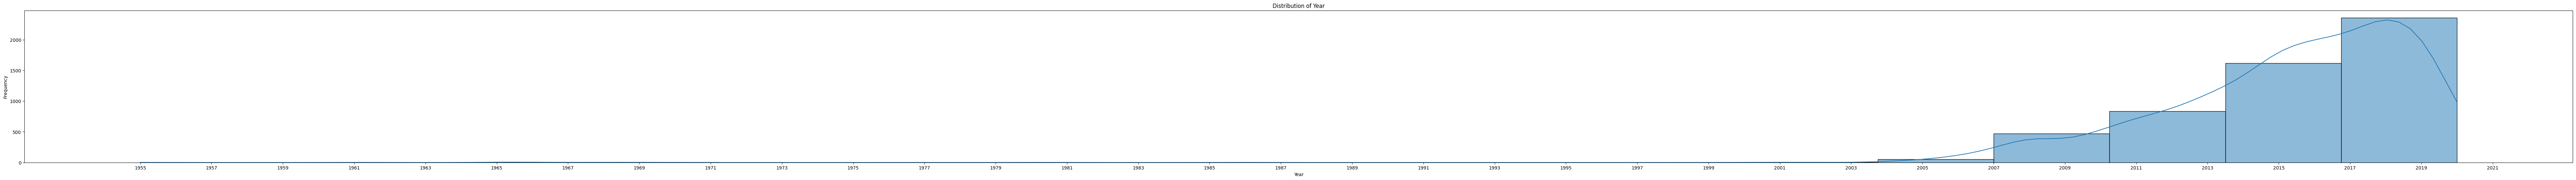

In [ ]:
# prompt: distribution for year column. Add more labels

# Assuming your DataFrame is named 'df' and already loaded
# If not, replace this with your data loading code:
# df = pd.read_csv("your_file.csv")

# Assuming 'year' is a column in your DataFrame
plt.figure(figsize=(100, 6))
sns.histplot(df['vehicle.year'], bins=20, kde=True)  # Adjust the number of bins as needed
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Customize the x-axis ticks for better readability (example)
plt.xticks(range(int(df['vehicle.year'].min()), int(df['vehicle.year'].max()) + 2, 2)) # Example: add ticks every 2 years

plt.show()

In [ ]:
# prompt: which cars are frequently rented

# Assuming 'df' is your DataFrame (as in the provided code)
frequent_cars = df[['vehicle.make','vehicle.model']].value_counts().head(10)  # Get the top 10 most frequent car makes
frequent_cars

,,count
vehicle.make,vehicle.model,
Tesla,Model Mazda 3,299
Ford,Mustang,140
Tesla,Model S,125
Jeep,Wrangler,115
Tesla,Model X,106
Toyota,Corolla,97
BMW,Mazda 3 Series,89
Mercedes-Benz,C-Class,84
Chevrolet,Corvette,74


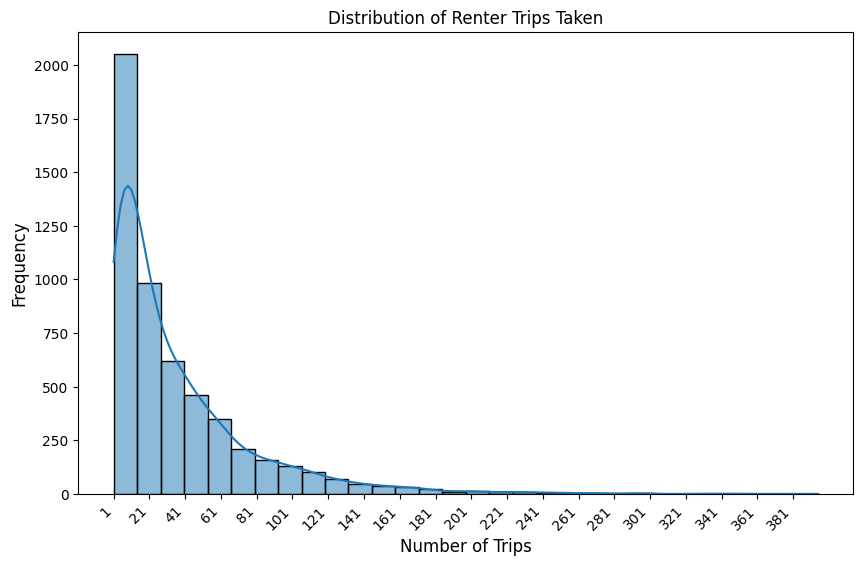

In [ ]:
# prompt: distirbution for renterTripsTaken add more labels on x-axis

# Assuming your DataFrame is named 'df' and already loaded
# If not, replace this with your data loading code:
# df = pd.read_csv("your_file.csv")

# Assuming 'renterTripsTaken' is a column in your DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(df['renterTripsTaken'], bins=30, kde=True)  # Adjust the number of bins as needed
plt.title('Distribution of Renter Trips Taken')
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize the x-axis ticks for better readability
# Example: Add more ticks and rotate labels if needed
plt.xticks(range(min(df['renterTripsTaken']), max(df['renterTripsTaken']) ,20))  # Example: ticks every 2 trips
plt.xticks(rotation=45, ha='right', fontsize=10)


plt.show()

In [ ]:
# prompt: add a column called revenue=renterTrips*rate.daily

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df=pd.read_csv("/content/sample_data/Project.csv")

# Add the 'revenue' column
df['revenue'] = df['renterTripsTaken'] * df['rate.daily']

# Now you can use the 'revenue' column in your analysis
# Example: Display the first few rows with the new column
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,revenue
0,ELECTRIC,5.00,13,12,Seattle,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019,1755
1,ELECTRIC,5.00,2,1,Tijeras,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018,380
2,HYBRID,4.92,28,24,Albuquerque,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012,980
3,GASOLINE,5.00,21,20,Albuquerque,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018,1575
4,GASOLINE,5.00,3,1,Albuquerque,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010,141


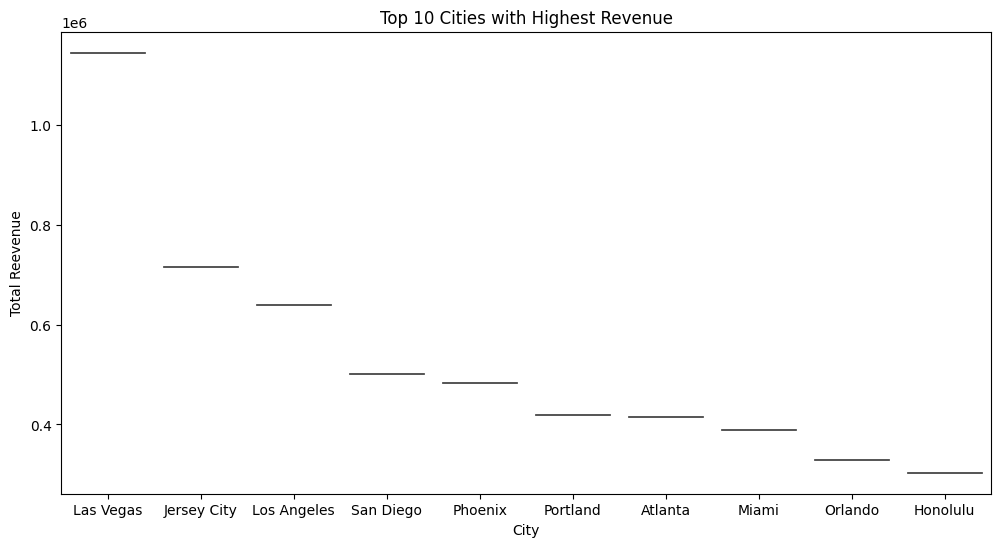

In [ ]:
# prompt: top 10 cities with highest revenue  violinplot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and already loaded with the 'revenue' column
# If not, replace this with your data loading and revenue calculation code:
# df = pd.read_csv("your_file.csv")
# df['revenue'] = df['renterTripsTaken'] * df['rate.daily']

# Group by city and sum the revenue
city_revenue = df.groupby('location.city')['revenue'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.violinplot(y=city_revenue.values, x=city_revenue.index) # Use violinplot
plt.title('Top 10 Cities with Highest Revenue')
plt.xlabel('City')
plt.ylabel('Total Reevenue')
plt.show()
#Even though the most number of cars rented are in California and Florida, still the 2nd highest revenue is from New Jersey

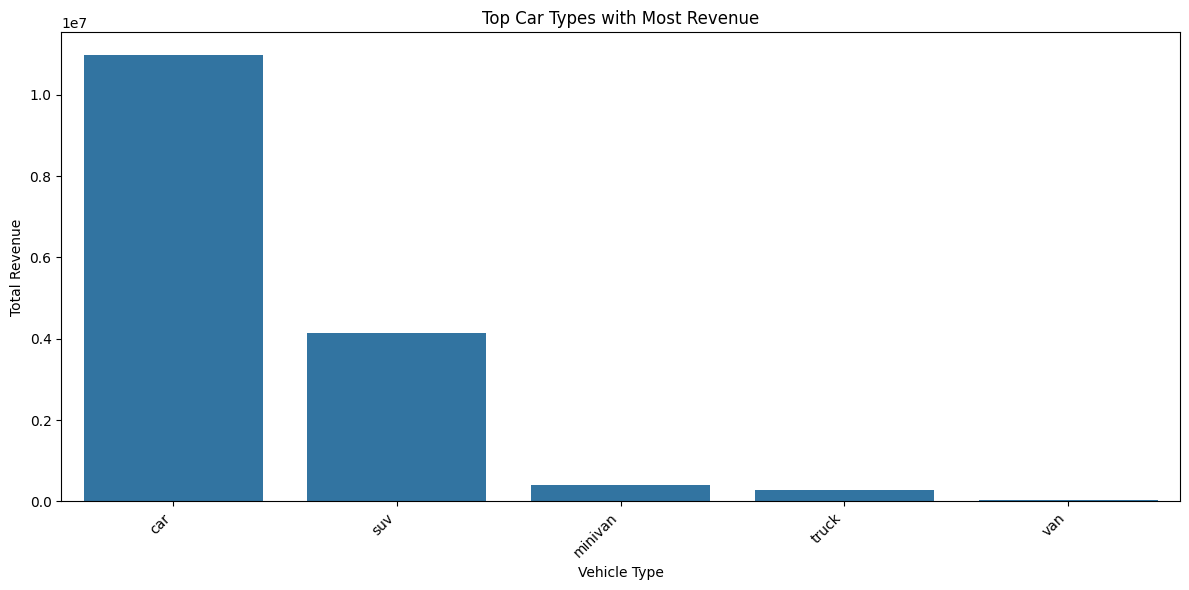

In [ ]:
# prompt: top car types with most revenue

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the 'revenue' column already calculated
# If not, load your data and calculate revenue as shown in the previous response

# Group by vehicle type and sum revenue
vehicle_revenue = df.groupby('vehicle.type')['revenue'].sum().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=vehicle_revenue.index, y=vehicle_revenue.values)
plt.title('Top Car Types with Most Revenue')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

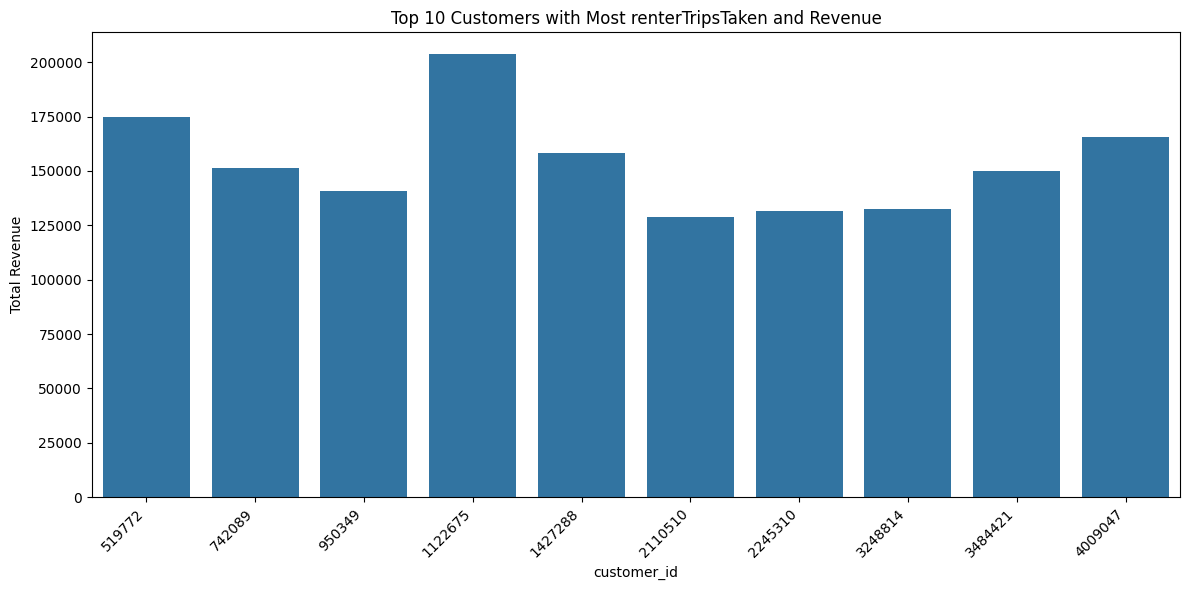

In [ ]:
# prompt: top 10 customers with the most renterTripsTaken and revenue. sort in descending order

# Assuming 'df' is your DataFrame with 'renterTripsTaken' and 'revenue' columns.
# If not, load your data and calculate revenue as shown in the previous response.

top_customers = df.groupby('renter.id').agg({'renterTripsTaken': 'sum', 'revenue': 'sum'})
top_customers = top_customers.sort_values(['renterTripsTaken', 'revenue'], ascending=False).head(10)

top_customers

In [ ]:
df_top1=df[df['owner.id']==1122675]

In [ ]:
df_top1['revenue'].sum()

203564

In [ ]:
df.groupby('owner.id').agg({'revenue':'sum','renterTripsTaken':'count'}).sort_values('revenue',ascending=False).head(10)

,revenue,renterTripsTaken
owner.id,,
1122675,203564,10
519772,175000,5
4009047,165417,47
1427288,158438,7
742089,151447,25
3484421,149805,13
950349,140649,26
3248814,132379,7
2245310,131397,22


In [ ]:
df.groupby('vehicle.type').agg({'revenue':'sum'}).sort_values('revenue',ascending=False)

,revenue
vehicle.type,
car,10986143
suv,4148990
minivan,411800
truck,280756
van,44343


from matplotlib import pyplot as plt
_df_0['revenue'].plot(kind='hist', bins=20, title='revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['revenue'].plot(kind='line', figsize=(8, 4), title='revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.groupby(['vehicle.make','vehicle.model']).agg({'revenue':'sum'}).sort_values('revenue',ascending=False)

revenue
vehicle.make vehicle.model               
Tesla        Model Mazda 3        1234997
Chevrolet    Corvette              674690
Tesla        Model X               624675
             Model S               518719
Ford         Mustang               422011
...                                   ...
Toyota       camry                     60
Volkswagen   Atlas Cross Sport         59
Lexus        RX Mazda 3Mazda 50L       58
FIAT         Mazda 500e                40
Infiniti     MMazda 3Mazda 5           32

[505 rows x 1 columns]

In [ ]:
# prompt: correlation matrix with corr() on df and cool-warm color setting

# Assuming 'df' is your DataFrame and already loaded

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

ValueError: could not convert string to float: 'ELECTRIC'